# <span style="font-size:18pt;"><mark style="background-color: white;">Un panorama des pratiques informatiques dans les publications de recherche dans la base de données HAL.</mark></span>
Un exemple des bonnes pratiques à mettre en place pour constituer un Notebook.

Créer par POPINEAU Maxime, en avril-mai 2023.

## <span style="font-size: 14pt"> Information sur les données.</span>

Les données utilisées dans ce notebook proviennent du site des archives ouvertes (https://hal.science/). Les archives ouvertes sont une plateforme numérique qui permet aux chercheurs de publier, partager et diffuser leurs travaux scientifiques en ligne.

Les données sont fournies au format texte en open source et sont accessibles via le site internet ou via l'API (Interface de programmation d'application). Une API fournit des "endpoints" permettant d'interagir avec leur site web et de récupérer des informations grâce à des recherches. Les APIs facilitent la communication entre plusieurs applications informatiques, ce qui facilite l'échange d'informations et permet aux développeurs de construire de nouvelles applications avec diverses utilisations.

L'utilisation d'une API nécessite également une chaîne de requête (query string en anglais), qui est une partie à ajouter à droite de l'URL de base pour inclure des paramètres et des valeurs.

Un exemple de chaîne de requête est : https://api.archives-ouvertes.fr/search/?q=%22jupyter%20notebook%22. Cette URL fonctionne directement dans notre navigateur web et renvoie les résultats de notre recherche.

https://api.archives-ouvertes.fr/search est la première partie qui permet de rechercher dans l'API des archives ouvertes. La deuxième partie, ?q=%22jupyter%20notebook%22, permet de spécifier notre requête, qui est "jupyter notebook".

Certains caractères, tels que l'espace ou les guillemets doubles, doivent être transmis correctement via le protocole HTTP pour être encodés. Le %22 correspond à l'encodage ASCII du caractère double guillemet et le %20 correspond à l'encodage de l'espace. Cela permet à l'ordinateur d'effectuer la requête sur "jupyter notebook" et non  "jupyter" et "notebook" séparément.

L'utilisation d'une API permet d'interroger les données en utilisant des paramètres, par exemple pour connaître le nombre d'articles publiés dans HAL en 2014.

Dans ce notebook, nous allons voir comment utiliser l'API des archives ouvertes ainsi que les bibliothèques pandas et matplotlib.

## <span style="font-size: 14pt"> Objectifs de ce Jupyter Notebook.</span>

Ce Jupyter Notebook a plusieurs buts :

1. Faire un panorama des pratiques numériques des chercheurs.
2. Fournir un exemple de Jupyter Notebook reproductible et de qualité.
3. Enseigner des compétences aux utilisateurs débutants ou expérimentés avec Python.

## <span style="font-size: 14pt"> Compétences.</span>

Ce Jupyter Notebook est à destination d'un public débutant. Il est conseillé de connaître le langage informatique Python pour suivre le Notebook mais pas obligatoire.

Le document permet d'acquérir des compétences variées comme :

1. Savoir utiliser les différentes librairies comme pandas et matplotlib.
2. Utiliser les fonctions en Python pour éviter la duplication du code.
3. Savoir faire une requête dans une API.



## Section 0 : Importation des librairies.

Dans cette section, nous allons importer les librairies nécessaires à notre analyse.

1. La librairie requests et json permet de faire les requêtes dans l'API de HAL.
2. Pandas est utilisé pour faire de l'analyse de données. La librarie fournit des fonctions pour créer, manipuler et analyser les DataFrames.
3. Matplotlib permet de faire des graphiques et de visualiser les données.

In [1]:
import requests, json
import pandas as pd
import matplotlib.pyplot as plt

## Section 1 : Analyse du nombre de publications concernant Python et les Jupyter Notebooks dans l'API de HAL.

## <span style="font-size: 12pt">1.0 : Utilisation d'une fonction qui retourne le nombre d'articles par année en fonction d'une recherche.</span>

Les fonctions permettent de rendre le code plus lisible et de réduire la duplication du code.

Pour faire une requête dans l'API, il est nécessaire de lire la documentation du site HAL disponible à cette adresse : https://api.archives-ouvertes.fr/docs/search

In [2]:
def get_publication_counts(query):
    # Effectue une requête pour obtenir le nombre total de publications
    req = requests.get(f"https://api.archives-ouvertes.fr/search/?q=text_fulltext:({query})&rows=0&facet=true&facet.field=publicationDateY_i")
    req_json = req.json()
    nb = req_json["response"]["numFound"]
    print(f"Le nombre total de résultats est de : {nb}\n")

    # Effectue une requête pour obtenir le nombre de publications par année
    year_counts = []
    for year in range(1995, 2023):
        req = requests.get(f"https://api.archives-ouvertes.fr/search/?q=text_fulltext:({query}) AND publicationDateY_i:{year}&rows=0")
        req_json = req.json()
        year_count = req_json["response"]["numFound"]
        year_counts.append((year, year_count))

    # Transforme la liste de tuples en un DataFrame pandas et le renvoie
    df = pd.DataFrame(year_counts, columns=["Année", "Nombre de publications"])
    return df

Nous allons ensuite appelé cette fonction et imprimer le dataframe créé grâce à la librairie Pandas.

In [3]:
df = get_publication_counts("python")
print(df)

Le nombre total de résultats est de : 29737

    Année  Nombre de publications
0    1995                       2
1    1996                       1
2    1997                       3
3    1998                       4
4    1999                       7
5    2000                       8
6    2001                      10
7    2002                      13
8    2003                      32
9    2004                      32
10   2005                      68
11   2006                     114
12   2007                     108
13   2008                     161
14   2009                     224
15   2010                     328
16   2011                     444
17   2012                     566
18   2013                     660
19   2014                     877
20   2015                    1048
21   2016                    1386
22   2017                    1930
23   2018                    2606
24   2019                    3577
25   2020                    4154
26   2021                    5148
27 

Le dataframe montre une augmentation importante des articles concernant Python dans la base de donnée HAL. Le nombre d'articles sur Python passe de 10 en 2001 à 444 en 2011 puis 5143 en 2021 soit une multiplication par 500 en l'espace d'une vingtaine d'années. Il est important de noter que l'année 2022 est la première année de baisse du nombre d'articles concernant Python par rapport à l'année précédente depuis 1996.

## <span style="font-size: 12pt">1.1 : Faire un graphique avec la librairie Matplotlib pour voir le nombre de publications sur Python en fonction des années.</span>

Nous allons passer maintenant à la représentation graphique avec la librairie Matplotlib.

Le nombre d'articles contenant le mot clé 'python' est de : 29737



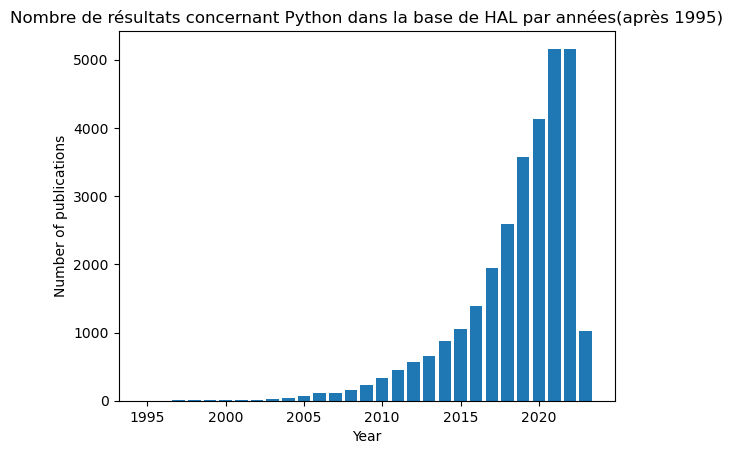

In [4]:
# Effectue une requête pour obtenir le nombre d'articles avec le mot-clé "Python"
query = "python"
req = requests.get(f"https://api.archives-ouvertes.fr/search/?q=text_fulltext:({query})&rows=0&facet=true&facet.field=producedDateY_i")
req_json = req.json()
nb = req_json["response"]["numFound"]
print(f"Le nombre d'articles contenant le mot clé '{query}' est de : {nb}\n")

# Effectue uen requête pour obtenir le nombre d'articles avec le mot-clé "Python" par année
year_counts = req_json["facet_counts"]["facet_fields"]["producedDateY_i"]
year_counts = [year_counts[i:i+2] for i in range(0, len(year_counts), 2) if int(year_counts[i]) >= 1995]
years = [int(year) for year, count in year_counts]
counts = [count for year, count in year_counts]

# Création du graphique
plt.bar(years, counts)
plt.title("Nombre de résultats concernant Python dans la base de HAL par années(après 1995)")
plt.xlabel("Year")
plt.ylabel("Number of publications")
plt.show()

Matplotlib est une librairie qui permet de faire ce graphique pour visualiser l'augmentation des articles sur Python dans la base de données HAL. 
L'année 2023 marquera probablement une baisse dans le nombre d'articles publiés sur Python dans la base de données de HAL car 5 mois se sont déjà écoulés et il n'y a même pas 1000 articles.

### <span style="font-size: 12pt"> 1.2 : Obtenir les résultats pour les Jupyter Notebooks.</span>

Nous appelons la même fonction que dans le 1.0

In [5]:
df = get_publication_counts("jupyter AND (notebook OR notebooks)")
print(df)

Le nombre total de résultats est de : 845

    Année  Nombre de publications
0    1995                       0
1    1996                       0
2    1997                       0
3    1998                       0
4    1999                       0
5    2000                       0
6    2001                       0
7    2002                       0
8    2003                       0
9    2004                       0
10   2005                       0
11   2006                       0
12   2007                       0
13   2008                       0
14   2009                       0
15   2010                       0
16   2011                       0
17   2012                       0
18   2013                       0
19   2014                       0
20   2015                       1
21   2016                      12
22   2017                      24
23   2018                      69
24   2019                     107
25   2020                     138
26   2021                     213
27   

Le dataframe montre une augmentation importante des articles concernant les Jupyter Notebooks dans la base de donnée HAL. Le nombre d'articles concernant les Jupyter Notebooks (avec et sans s) passent de 12 en 2016 à 70 (multiplé par 5) en 2018 puis à 223 en 2022. Le nombre de publications a été multiplé à peu près par 19 entre 2016 et 2022.

Il est important de comparer cette hausse d'intérêt pour Python et pour les Jupyter Notebooks à la hausse du nombre d'articles dans HAL. 
Cette hausse du nombre d'articles pourrait ne pas être la conséquence d'une hausse d'intérêt mais d'une hausse dans le nombre d'articles.

## <span style="font-size: 12pt"> 1.3 : Calculer le pourcentage d'articles concernant Python et les Jupyter Notebooks sur le nombre total d'articles dans la base de données HAL en fonction des années.</span>

Nous utilisons l'API de HAL et la librairie pandas pour créer un tableau.

In [6]:
# Récupère le nombre total d'articles pour chaque année
total_counts = []
for year in range(1995, 2023):
    req = requests.get(f"https://api.archives-ouvertes.fr/search/?q=*&fq=producedDateY_i:{year}&rows=0")
    req_json = req.json()
    year_count = req_json["response"]["numFound"]
    total_counts.append((year, year_count))
total_df = pd.DataFrame(total_counts, columns=["year", "total_articles"])

# Récupère le nombre d'articles concernant Python pour chaque année
python_counts = []
for year in range(1995, 2023):
    req = requests.get(f"https://api.archives-ouvertes.fr/search/?q=text_fulltext:(Python)&fq=producedDateY_i:{year}&rows=0")
    req_json = req.json()
    year_count = req_json.get("response", {}).get("numFound", 0)
    python_counts.append((year, year_count))
python_df = pd.DataFrame(python_counts, columns=["year", "python_articles"])

# le nombre d'articles concernant les Jupyter Notebooks pour chaque année
jupyter_counts = []
for year in range(1995, 2023):
    req = requests.get(f"https://api.archives-ouvertes.fr/search/?q=text_fulltext:(jupyter AND (notebook OR notebooks))&fq=producedDateY_i:{year}&rows=0")
    req_json = req.json()
    year_count = req_json.get("response", {}).get("numFound", 0)
    jupyter_counts.append((year, year_count))
jupyter_df = pd.DataFrame(jupyter_counts, columns=["year", "jupyter_articles"])

# Fusionne les trois dataframes
merged_df = pd.merge(total_df, python_df, on="year")
merged_df = pd.merge(merged_df, jupyter_df, on="year")

# Calcul le pourcentage des articles concernant Python et les JupyterNotebooks pour chaque année.
merged_df["percent_python"] = merged_df["python_articles"] / merged_df["total_articles"] * 100
merged_df["percent_jupyter"] = merged_df["jupyter_articles"] / merged_df["total_articles"] * 100

# Visualise le tableau
print(merged_df)

    year  total_articles  python_articles  jupyter_articles  percent_python  \
0   1995           22489                2                 0        0.008893   
1   1996           24106                1                 0        0.004148   
2   1997           25854                4                 0        0.015471   
3   1998           27630                4                 0        0.014477   
4   1999           28524                6                 0        0.021035   
5   2000           32962                8                 0        0.024270   
6   2001           34906               10                 0        0.028648   
7   2002           42052               13                 0        0.030914   
8   2003           51433               31                 0        0.060273   
9   2004           62754               34                 0        0.054180   
10  2005           83609               67                 0        0.080135   
11  2006           99794              114           

Le tableau montre que le pourcentage des documents concernant Python et les Jupyter Notebooks augmente dans le total de documents publiés dans HAL. L'intérêt pour Python et les Jupyter Notebooks augmente dans le cadre de la recherche.

En 2002, les documents relatifs à Python ne représentaient que 0,03% du total des documents présents dans la base de données HAL. Ce chiffre est passé à 0,37% en 2012 et a atteint 3,31% en 2022. 

Le Projet Jupyter a été lancé en 2014. Les premiers résultats apparaissent en 2015 avec un document traitant des Jupyter Notebooks. En 2019, le pourcentage des documents relatifs aux Jupyter Notebooks représentaient 0,05% du nombre total de documents présents. Ce chiffre est de 0,14% en 2022.

Bien que l'intérêt pour Python et les Jupyter Notebooks soit en hausse, le nombre d'articles les concernant reste relativement faible dans la base de données de HAL.

Il est intéressant de voir quelles sont les mots clés les plus cherchés dans la base des archives ouvertes si Python ne représente que 3.30% des documents présents et les Jupyter Notebooks que 0,14% des documents présents.

## Section 2 : Travail d'analyse sur la recherche "Python" et "Jupyter Notebook".

Cette section permet de voir comment faire une requête dans l'API de HAL pour obtenir le type de documents concernant une recherche précise (dans notre exemple : Python et les Jupyter Notebooks).

Nous verrons aussi comment récupérer dans l'API de HAL le domaine d'une recherche.

## <span style="font-size: 12pt"> 2.0 : Obtenir le type de document en fonction d'une recherche.</span>

Pour faire une requête dans l'API, il est nécessaire de lire la documentation du site HAL disponible à cette adresse : https://api.archives-ouvertes.fr/docs/search

In [7]:
def get_doc_types(query):
    req = requests.get(f"https://api.archives-ouvertes.fr/search/?q={query}&rows=0&facet=true&facet.field=docType_s")
    req_json = req.json()
    doc_types = req_json["facet_counts"]["facet_fields"]["docType_s"]
    doc_types = [doc_types[i:i+2] for i in range(0, len(doc_types), 2)]
    total_docs = req_json["response"]["numFound"]
    doc_types_dict = {doc_type: count/total_docs*100 for doc_type, count in doc_types}
    return doc_types_dict

Nous faisons une fonction que nous allons appeler dans la suite de notre code comme dans la Section 1.

In [8]:
doc_types = get_doc_types("text_fulltext:(python)")
print(doc_types)

{'ART': 47.17355483068231, 'COMM': 25.587651746981876, 'THESE': 11.974980663819485, 'UNDEFINED': 5.346874264384437, 'REPORT': 2.649897434172916, 'MEM': 2.2564481958502873, 'COUV': 1.4863637892188184, 'POSTER': 0.8339778726838618, 'HDR': 0.6860140565625316, 'OTHER': 0.5481386824494737, 'OUV': 0.41362612233917345, 'LECTURE': 0.32283014426472073, 'PROCEEDINGS': 0.211857282173723, 'SOFTWARE': 0.1715035141406329, 'BLOG': 0.11433567609375525, 'PRESCONF': 0.09079597807445271, 'ISSUE': 0.030265326024817567, 'VIDEO': 0.023539698019302554, 'OTHERREPORT': 0.016814070013787537, 'REPORT_FORM': 0.013451256011030031, 'REPORT_LICE': 0.013451256011030031, 'REPORT_LABO': 0.010088442008272523, 'ETABTHESE': 0.0033628140027575078, 'MAP': 0.0033628140027575078, 'MEMLIC': 0.0033628140027575078, 'REPORT_LPRO': 0.0033628140027575078, 'REPORT_MAST': 0.0033628140027575078, 'SYNTHESE': 0.0033628140027575078, 'TRAD': 0.0033628140027575078, 'CREPORT': 0.0, 'DOUV': 0.0, 'IMG': 0.0, 'MANUAL': 0.0, 'NOTE': 0.0, 'NOTIC

Parmi les documents liés à Python dans la base de données HAL, les articles scientifiques représentent 47%, suivis des communications à 25%, et des thèses à 11%. En revanche, les cours ne représentent qu'une faible proportion de 0,32%.

In [9]:
doc_types = get_doc_types("jupyter AND (notebook OR notebooks)")
print(doc_types)

{'ART': 39.130434782608695, 'COMM': 32.608695652173914, 'BLOG': 6.521739130434782, 'LECTURE': 6.521739130434782, 'UNDEFINED': 5.434782608695652, 'OUV': 2.1739130434782608, 'REPORT': 2.1739130434782608, 'SOFTWARE': 2.1739130434782608, 'POSTER': 1.0869565217391304, 'THESE': 1.0869565217391304, 'VIDEO': 1.0869565217391304, 'COUV': 0.0, 'CREPORT': 0.0, 'DOUV': 0.0, 'ETABTHESE': 0.0, 'HDR': 0.0, 'IMG': 0.0, 'ISSUE': 0.0, 'MANUAL': 0.0, 'MAP': 0.0, 'MEM': 0.0, 'MEMLIC': 0.0, 'NOTE': 0.0, 'NOTICE': 0.0, 'OTHER': 0.0, 'OTHERREPORT': 0.0, 'PATENT': 0.0, 'PRESCONF': 0.0, 'PROCEEDINGS': 0.0, 'REPACT': 0.0, 'REPORT_COOR': 0.0, 'REPORT_DOCT': 0.0, 'REPORT_ETAB': 0.0, 'REPORT_FORM': 0.0, 'REPORT_FPROJ': 0.0, 'REPORT_GLICE': 0.0, 'REPORT_GMAST': 0.0, 'REPORT_LABO': 0.0, 'REPORT_LICE': 0.0, 'REPORT_LPRO': 0.0, 'REPORT_MAST': 0.0, 'REPORT_RETABINT': 0.0, 'REPORT_RFOINT': 0.0, 'SON': 0.0, 'SYNTHESE': 0.0, 'TRAD': 0.0}


Parmi les documents liés aux Jupyter Notebooks dans la base de données HAL, les articles scientifiques représesentent 39%, les communications 32% et des blogs à 6,52%. Les cours représentent eux seulement 6%.

Nous pouvons nous demander aussi dans quelle discipline les Jupyter Notebooks sont utilisés. Notre hypothèse est dire que ce format est plus utilisé en informatique et dans les disciplines scientifiques comme en physique par exemple.

## <span style="font-size: 12pt"> 2.1 : Obtenir le domaine des articles concernant les Jupyter Notebooks.</span>

Nous allons voir comment obtenir le domaine d'une recherche grâce à l'API de HAL.

In [10]:
# Faire la requête pour obtenir le nombre de documents contenant "jupyter" et "notebook(s)"
req = requests.get("https://api.archives-ouvertes.fr/search/?q=text_fulltext:(jupyter AND (notebook OR notebooks))&rows=0&facet=true&facet.field=domain_s")

# Obtenir les données de la requête au format JSON
req_json = req.json()

# Extraire les domaines et leur nombre de la réponse JSON
domain_counts = req_json["facet_counts"]["facet_fields"]["domain_s"]
domain_counts = [(domain_counts[i], domain_counts[i+1]) for i in range(0, len(domain_counts), 2)]

# Séparer les domaines multiples et leur nombre de documents en entrées individuelles
domain_counts_split = []
for domain_count in domain_counts:
    domains = domain_count[0].split(';')
    for domain in domains:
        domain_counts_split.append((domain.strip(), domain_count[1]))  # Garder le domaine complet

# Calculer le nombre total de documents
total = sum([count for _, count in domain_counts_split])

# Calculer le pourcentage de documents par domaine
domain_percents = [(domain[0], domain[1]/total*100) for domain in domain_counts_split]

# Filtrer les domaines ayant un seul mot et un pourcentage supérieur à 0,5% et supprimer les domaines spécifiques
domain_percents_filtered = [(domain, percent) for domain, percent in domain_percents if percent > 0.5 and len(domain.split()) == 1
                            and not any(domain_specific in domain for domain_specific in ["1.info.info-ai", "1.info.info-bi", "1.phys.astr", "info.info-lg", "sdv.neu", "sdu.ocean", "math.math-st"])]

# Supprimer les domaines qui commencent par "1"
domain_percents_filtered = [(domain, percent) for domain, percent in domain_percents_filtered if not domain.startswith("1")]

# Créer un dataframe à partir des pourcentages filtrés et trier par ordre décroissant
df = pd.DataFrame(domain_percents_filtered, columns=["Domaine", "Pourcentage"])
df = df.sort_values(by=["Pourcentage"], ascending=False)

# Afficher le dataframe
print(df)

   Domaine  Pourcentage
0   0.info    17.933810
1    0.sdv     7.245081
2   0.phys     4.338104
3    0.sdu     4.069767
4    0.shs     3.890877
5   0.math     2.996422
6    0.spi     2.862254
7    0.sde     1.833631
8   0.stat     1.654741
9   0.scco     1.162791
10  0.chim     0.983900


Les Jupyter Notebooks commencent à être utiliser en SHS mais très peu (3,8%) par rapport à l'informatique (17%) ou en Statisques et Données de la Vie (7%).

Il est encore assez compliqué de trouver des Notebooks disponibles en SHS que cela soit en Histoire ou en Géographie. Une explication peut être le fait que la pratique des Notebooks en SHS est nouvelle et aussi le fait que les sciences sociales ont moins besoin d'utiliser des langages informatiques qu'en informatique et qu'en Statistiques et Données de la Vie. Le manque de ressources sur comment bien utiliser les Jupyter Notebooks dans le cadre des SHS peut être une cause aussi de ce faible pourcentage.

## Section 3 : Travail général sur les pratiques numériques des chercheurs.

Nous allons voir dans cette partie quels sont les logiciels et les différents langages informatiques (autre que Python) que les chercheurs utilisent le plus dans la base de HAL.

## <span style="font-size: 12pt"> 3.0 : Les autres pratiques numériques des chercheurs.</span>

In [11]:
# Liste des termes de recherche
terms = ["langage de programmation Julia", "Rstudio", "Python", "pascal langage informatique", "Matlab", "Javascript", "Spss", "Stata", "Fortran", "Javascript", "Bash", "Rust", "SAS", "Excel", "Libreoffice", "Perl", "HTML"]

# Dictionnaire pour stocker les résultats
results = {}

# Pour chaque terme de recherche, faire une requête et extraire le nombre total de résultats
for term in terms:
    req = requests.get(f"https://api.archives-ouvertes.fr/search/?q={term}&rows=0")
    req_json = req.json()
    total = req_json["response"]["numFound"]
    results[term] = total

# Afficher les résultats sous forme de tableau
import pandas as pd

df = pd.DataFrame.from_dict(results, orient="index", columns=["Nombre de documents"])
df = df.sort_values(by=["Nombre de documents"], ascending=False)

print(df)

                                Nombre de documents
SAS                                           10756
Matlab                                         2848
HTML                                           2729
Python                                         2632
Rust                                           1111
Perl                                            852
Excel                                           661
Fortran                                         541
Javascript                                      432
Stata                                           423
Spss                                            354
pascal langage informatique                     214
Bash                                             47
Rstudio                                          42
Libreoffice                                      12
langage de programmation Julia                    8


Il est intéressant de voir les différentes pratiques numériques des chercheurs. Python a pris beaucoup d'importance mais il est important de voir que les chercheurs utilisent aussi d'autres langages informatiques comme HTML, Perl, Pascal ou bien Javascript. Les chercheurs utilisent aussi des logiciels comme Rstudio, LibreOffice mais surtout Excel.

## <span style="font-size: 12pt"> 3.1 : Les principaux types de documents.</span>

Il est important de voir les autres pratiques numériques des chercheurs et de comparer le type de document produit dans la plateforme HAL.

In [12]:
# Liste des termes de recherche
terms = ["langage de programmation Julia", "Rstudio", "Python", "pascal langage informatique", "Matlab", "Javascript", "Spss", "Stata", "Fortran", "Javascript", "Bash", "Rust", "SAS", "Excel", "Libreoffice", "Perl", "HTML"]

# Dictionnaire pour stocker les résultats
results = {}

# Pour chaque terme de recherche, faire une requête et extraire les pourcentages de chaque type de document
for term in terms:
    doc_types_dict = get_doc_types(term)
    results[term] = doc_types_dict

# Afficher les résultats sous forme de tableau
df_list = []
for term, doc_types_dict in results.items():
    df = pd.DataFrame.from_dict(doc_types_dict, orient="index", columns=[term])
    df = df.loc[df[term] > 0].sort_values(by=[term], ascending=False).head(3)
    df.dropna(axis=1, inplace=True)
    df_list.append(df)

df_final = pd.concat(df_list, axis=1)
df_final.fillna("", inplace=True)
df_final.dropna(axis=0, how='all', inplace=True)
print(df_final)

          langage de programmation Julia    Rstudio     Python  \
COMM                                62.5  33.333333  24.620061   
THESE                               25.0              6.458967   
LECTURE                             12.5                         
ART                                       23.809524  48.138298   
REPORT                                      9.52381              
COUV                                                             
POSTER                                                           
MEM                                                              
BLOG                                                             
UNDEFINED                                                        
OTHER                                                            

          pascal langage informatique     Matlab Javascript       Spss  \
COMM                        41.588785  42.029494  55.092593   17.79661   
THESE                       13.084112  14.255618   6.712963

D'après les résultats obtenus, il apparaît que les types de documents les plus fréquemment associés à nos termes de recherche sont très majoritairement soit des articles scientifiques ou des communications ce qui est le même résultat que pour "Python" et les "Jupyter Notebooks" obtenu dans la section 2.0

Nous avons vu comment mettre des paramètres dans notre query avec le "query string" mais il y a une autre manière de faire.

On peut créer un dictionnaire et les paramètres sont passés en tant qu'arguments. Lorsque la requête est effectuée, la bibliothèque requests construit automatiquement l'URL avec les paramètres spécifiés dans le dictionnaire params. Cela permet de spécifier les paramètres de manière plus structurée et flexible, en utilisant une syntaxe de dictionnaire.

In [13]:
# Effectuer une requête pour obtenir les types de document pour tous les documents dans HAL
params = {
    "q": "*:*",
    "rows": 0,
    "fl": "docType_s",
    "facet": "true",
    "facet.field": "docType_s"
}
req = requests.get("https://api.archives-ouvertes.fr/search/", params=params)
req_json = req.json()

# Extraire les types de document et leurs nombres de la réponse JSON
doc_types = req_json["facet_counts"]["facet_fields"]["docType_s"]
doc_types_dict = {doc_type: count for doc_type, count in zip(doc_types[::2], doc_types[1::2])}

# Créer un DataFrame à partir des types de document
df = pd.DataFrame.from_dict(doc_types_dict, orient="index", columns=["Nombre de documents"])
df = df.sort_values(by=["Nombre de documents"], ascending=False)

# Calculer les pourcentages de chaque type de document par rapport au total
total_documents = df["Nombre de documents"].sum()
df["Pourcentage"] = df["Nombre de documents"] / total_documents * 100

# Afficher le DataFrame
print(df)

                 Nombre de documents  Pourcentage
ART                          1626205    47.971201
COMM                          803641    23.706497
COUV                          290548     8.570836
THESE                         143901     4.244916
OUV                            98939     2.918588
UNDEFINED                      66741     1.968784
MEM                            60481     1.784121
OTHER                          59962     1.768811
REPORT                         59718     1.761613
IMG                            56724     1.673294
POSTER                         49283     1.453793
ISSUE                           9996     0.294871
NOTICE                          8268     0.243897
PROCEEDINGS                     8016     0.236463
HDR                             6845     0.201920
PATENT                          6110     0.180238
BLOG                            6028     0.177819
REPORT_LABO                     5205     0.153542
VIDEO                           3965     0.116963


En analysant le nombre total de documents dans la base de HAL, on constate que les deux types de documents les plus fréquents sont des articles scientifiques et des communications. Cela correspond aux mêmes résultats obtenus pour "Python" et les "Jupyter Notebooks". Environ 70% des documents présents dans la base des archives ouvertes sont des articles scientifiques ou des communications.

Notre Jupyter Notebook est fini : en espérant qu'il vous a plu et qu'il était clair !

Si vous avez des questions ou des retours, merci de m'écrire à mon adresse email universitaire : maxime.popineau@etu.univ-tours.fr.

Les IpyWidgets permettent à des utilisateurs qui ne savent pas coder d'utiliser l'API des HAL avec des paramètres comme le type de documents ou les années.

In [1]:
import ipywidgets as widgets
from IPython.display import display

# Fonction pour effectuer la requête sur l'API HAL
def make_hal_request(query, year, doc_type):
    url = f"https://api.archives-ouvertes.fr/search/?q={query}&fq=docType_s:{doc_type}&fq=producedDateY_i:{year}&wt=json"
    response = requests.get(url)
    try:
        data = response.json()
        return data
    except json.JSONDecodeError:
        print('Erreur lors de l\'analyse de la réponse JSON de l\'API.')
        return None

# Options de requête
doc_types = ['ART', 'COMM', 'OUV', 'THESE']

# Création des widgets
query_widget = widgets.Textarea(value='', placeholder='Saisissez votre requête ici', description='Requête:')
year_widget = widgets.Dropdown(options=['Toutes les années'] + list(range(2010, 2023)), description='Année:')
doc_type_widget = widgets.Dropdown(options=['Tous les types'] + doc_types, description='Type de document:')
display_type_widget = widgets.RadioButtons(options=['Tableau', 'Graphique'], description='Affichage:')
button = widgets.Button(description='Effectuer la requête')

# Fonction de rappel du bouton
def on_button_click(b):
    query = query_widget.value.strip()
    year = year_widget.value
    doc_type = doc_type_widget.value
    
    # Vérification de la validité de la requête
    if not query:
        print('Veuillez saisir une requête valide.')
        return
    
    # Si l'option "Toutes les années" est sélectionnée, on utilise un caractère générique '*' pour la requête
    if year == 'Toutes les années':
        year = '*'
    
    # Si l'option "Tous les types" est sélectionnée, on utilise un caractère générique '*' pour le type de document
    if doc_type == 'Tous les types':
        doc_type = '*'
    
    # Appel de la fonction pour effectuer la requête
    data = make_hal_request(query, year, doc_type)
    
    # Vérification de la réponse de l'API
    if data is None:
        return
    
    # Traitement des résultats
    num_results = data['response']['numFound']
    print(f"Nombre total de documents : {num_results}")
    
    # Exemple d'affichage sous forme de tableau
    if display_type_widget.value == 'Tableau':
        if year == '*':
            if doc_type == '*':
                years = list(range(2010, 2023))
                counts = []
                for year in years:
                    data = make_hal_request(query, year, doc_type)
                    if data is not None:
                        counts.append(data['response']['numFound'])
                
                df = pd.DataFrame({'Année': years, 'Nombre de documents': counts})
                display(df)
            else:
                print('Veuillez sélectionner "Toutes les années" pour afficher les résultats sous forme de tableau.')
        else:
            print('Veuillez sélectionner "Toutes les années" pour afficher les résultats sous forme de tableau.')
    
    # Exemple d'affichage sous forme de graphique
    elif display_type_widget.value == 'Graphique':
        if year == '*':
            if doc_type == '*':
                years = list(range(2010, 2023))
                counts = []
                for year in years:
                    data = make_hal_request(query, year, doc_type)
                    if data is not None:
                        counts.append(data['response']['numFound'])
                
                plt.figure(figsize=(10, 6))
                plt.plot(years, counts, marker='o')
                plt.xlabel('Année')
                plt.ylabel("Nombre de documents")
                plt.title('Nombre de documents publiés par année')
                plt.show()
            else:
                print('Veuillez sélectionner "Toutes les années" pour afficher les résultats sous forme de graphique.')
        else:
            print('Veuillez sélectionner "Toutes les années" pour afficher les résultats sous forme de graphique.')

# Lier la fonction de rappel au bouton
button.on_click(on_button_click)

# Afficher les widgets
display(query_widget, year_widget, doc_type_widget, display_type_widget, button)


Textarea(value='', description='Requête:', placeholder='Saisissez votre requête ici')

Dropdown(description='Année:', options=('Toutes les années', 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2…

Dropdown(description='Type de document:', options=('Tous les types', 'ART', 'COMM', 'OUV', 'THESE'), value='To…

RadioButtons(description='Affichage:', options=('Tableau', 'Graphique'), value='Tableau')

Button(description='Effectuer la requête', style=ButtonStyle())